In [3]:
import numpy as np
import pickle
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')
import sympy

import matplotlib.pyplot as plt
import matplotlib as mpl

# mpl.rcParams['font.size'] = 18
# mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.autolayout'] = True
np.random.seed(0)

In [2]:
# Model parameters
δ = 0.01
η = 0.032
median = 1.75/1000
h_hat = 0.2
σ_n = 1.2
γ_low = 0.012
γ_high = 0.024
ξ = 8*δ*η

In [3]:
ξ

0.00256

In [4]:
γ_base = 0.018

In [5]:
with open("../data/pulse_experiment", "rb") as f:
    λ_u = pickle.load(f)

λ_u = np.mean(λ_u, axis=0)

In [6]:
def simulate_log_damage(λ, σ_n, Et, Ws):
    """
    Simulate log damage.

    Parameters
    ----------
    exp_avg_response, σ_n : float
        Model parameters.
    Et : (T, ) ndarray
        Emission trajectory.
    Ws : (N, T) ndarray
        Iid normal shocks for N paths.

    Returns
    -------
    Ys : (T, ) ndarray
        Simulated log damages.

    """
    
    Ys = np.zeros(Ws.shape)
    for path in range(Ws.shape[0]):
        Y = 0.
        for i in range(Ws.shape[1]):
            dY = λ[i] * Et[i] * (1+σ_n*Ws[path,i])
            Ys[path, i] = dY + Y
            Y = Ys[path, i]
    
    return Ys

In [7]:
def plot_N(N, W):
    path, T = W.shape
    for p in range(path):
        plt.plot(N[p], label = str(p))

In [8]:
def simulate_log_damage_with_drift(λ, σ_n, Et, Ht, Ws, with_drift = True):
    """
    Simulate log damage.

    Parameters
    ----------
    exp_avg_response, σ_n : float
        Model parameters.
    Et : (T, ) ndarray
        Emission trajectory.
    Ws : (N, T) ndarray
        Iid normal shocks for N paths.

    Returns
    -------
    Ys : (T, ) ndarray
        Simulated log damages.

    """
    
    Ys = np.zeros(Ws.shape)
    if with_drift:
        for path in range(Ws.shape[0]):
            Y = 0.
            for J in range(Ws.shape[1]):
                log_N = 0.
                for j in range(J):
                    log_N += λ[j] * Et[J-j] * (1+σ_n*(Ws[path,J-j] + Ht[J-j]))
                
                Ys[path, J] = log_N
                
                
    else:
        for path in range(Ws.shape[0]):
            Y = 0.
            for J in range(Ws.shape[1]):
                log_N = 0.
                for j in range(J):
                    log_N += λ[j] * Et[J-j] * (1+σ_n*Ws[path,J-j])
                
                Ys[path, J] = log_N
                
            
    return Ys

W1m = np.random.normal(0., 1., (100_000, T))

log_N_low1m = simulate_log_damage(λ_low, σ_n, e_low_102, W1m)

N_low1m = np.exp(log_N_low1m)

In [9]:
with open("../data/base_8", "rb") as f:
    base_8 = pickle.load(f)

In [10]:
e_base = base_8["e_base1"]
e_base05 = base_8["e_base05"]

λ_base = λ_u*γ_base
# sigma_n = 1.2, xi = 0.00256
e_base_102 = e_base[:102]
e_base05_102 = e_base05[:102]

In [11]:
h_hat_base = e_base*median*γ_base*σ_n/(ξ*1)
h_hat_base05 = e_base05*median*γ_base*σ_n/(ξ*.5)*1.75*σ_n

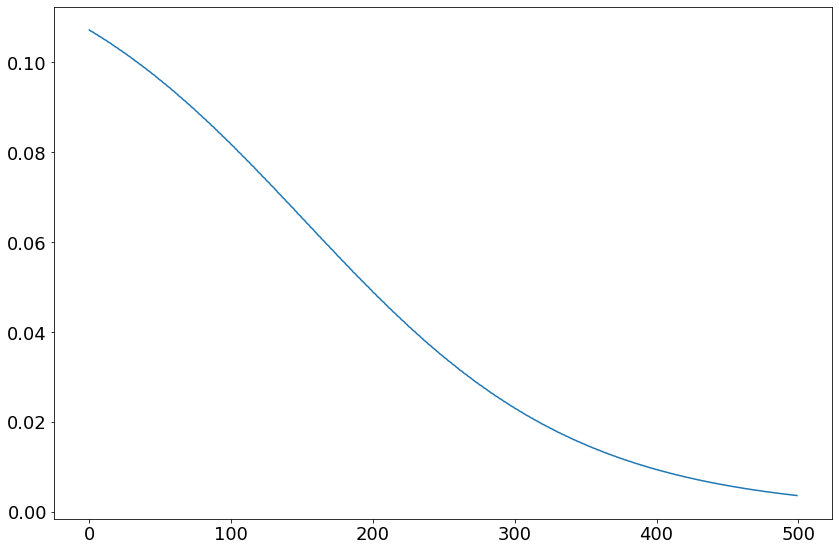

In [12]:
plt.plot(h_hat_base)

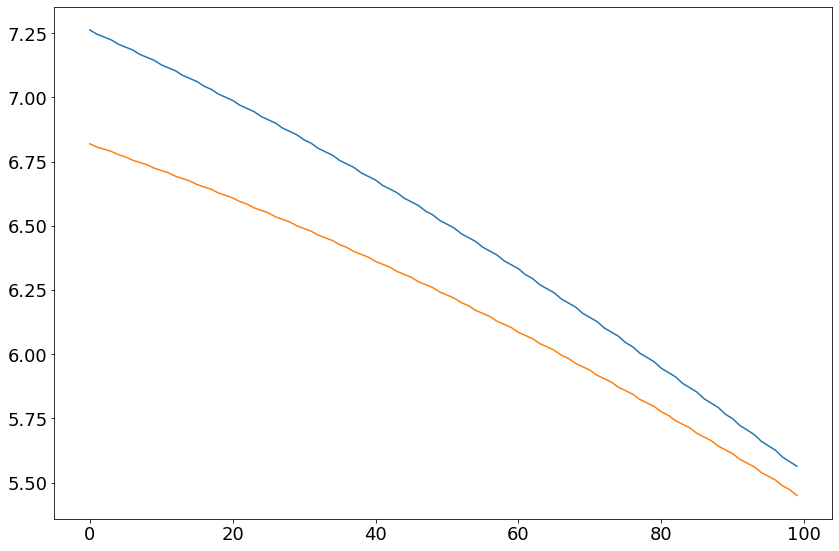

In [13]:
plt.plot(e_base[:100])
plt.plot(e_base05[:100])

Text(0, 0.5, 'emission')

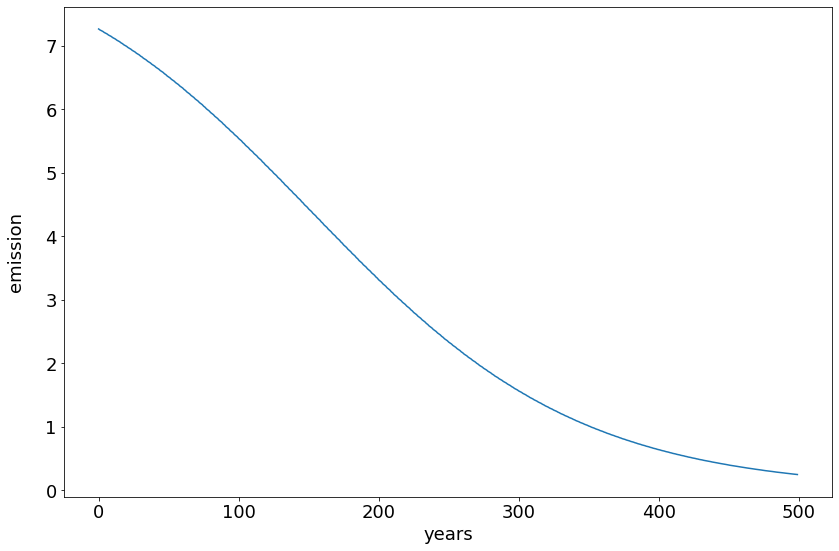

In [14]:
plt.plot(e_base)
# plt.plot(e_base05_102)
plt.xlabel("years")
plt.ylabel("emission", labelpad=20)
# plt.savefig("ems_quantile,png")

### SCC simulation
$X_t = (\log K_t, Z_t, \log N_t)'$ 

\begin{equation}
\begin{aligned}
    - \frac{\delta}{\alpha - i/k} + 1 - \kappa (i/k) = 0 
\end{aligned}
\end{equation}
All annual data:
$$
\alpha = .2, \quad \delta = .008, \quad \kappa = 7
$$

$$
i/k = .127
$$
and is rounded to .125.

SCC is computed according to:
$$
    SCC_t = \frac{\eta[\alpha - i/k] K_t}{ ( 1 - \eta) E_t N_t}
$$

where
$$
  d\log{K_t} = [\mu_k(Z_t) + i/k - \frac{\kappa}{2}(i/k)^2 - \frac{|\sigma_k|^2}{2}]dt + \sigma_k(Z_t)dW_t  
$$
Where initial value:
$$
    \log{K_0} = 80/\alpha 
$$

$$
    \mu_k(z) = - .05 + .04 \cdot z
$$

$$
\sigma_k(z)' = (.019, 0, 0) 
$$

$Z_t$ process:
$$
dZ_t = \mu_z(Z_t) dt + \sigma_z(Z_t) dW_t
$$
Where
$$
\mu_z(z) = - .056z
$$

$$
\sigma_z(z)' = (.044, .1, 0) 
$$

$\log{N_t}$ process:
$$
dlogN_t^1 = \iota' Y_t
$$
and
$$
dY_t = \Lambda Y_t dt + \Theta (E_t + E_t \sigma_n dW)
$$

$$
\sigma_n(z) = \lambda E \sigma_n
$$

dW = np.random.normal(0, 1, size=(3, 1000, 102))
dW[:,0, 0]
with open("dW_0211", "wb") as f:
    pickle.dump(dW,f)

dW = pickle.load(open("dW_0211", "rb"))

In [15]:
# set time
T  = 102
size = 1_000

In [16]:
dW = np.random.normal(0,1, (3, size, T))

In [167]:
sigma_z = np.array([.044, .1, 0])
np.dot(sigma_z, dW[:,0, 0])

0.04888747538402841

In [18]:
alpha = 0.2
eta = .032
kappa = 7
delta = .008
invkap = .125

alpha_z = 0
beta_z = .014

In [19]:
sig_z = np.sqrt((sigma_z[0]**2 + sigma_z[1]**2)/(1 - (1-.014)**2))
sig_z

0.6552028308336593

In [20]:
def simulate_z(dW, z0, alpha_z, beta_z, sigma_z, Ht=0, dt=1):
    _, path, time = dW.shape
    zt = np.zeros((path, time))
    zt[:, 0] = z0
    z = z0
    for t in range(time-1):
        dz = (alpha_z - beta_z*z)*dt+ np.dot(sigma_z*dt, Ht + dW[:, :, t])
        z = dz + z
        zt[:,t+1] = z
    return zt

In [21]:
z0 = np.random.normal(0, sig_z, size=(size))

In [22]:
sigma_z = np.array([.044, .1, 0])
zt = simulate_z(dW, z0, 0, .014, sigma_z)

Text(0, 0.5, '$Z_t$')

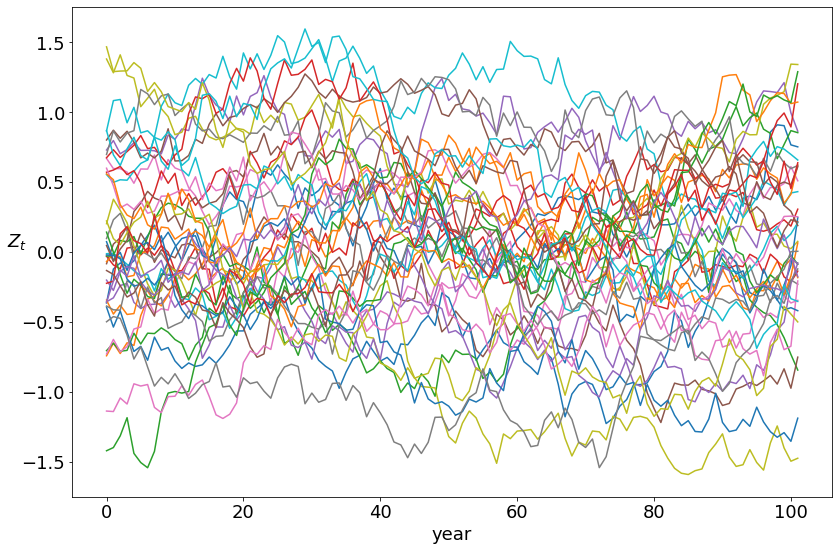

In [23]:
for p in range(40):
    plt.plot(zt[p])
plt.xlabel('year')
plt.ylabel(r'$Z_t$', rotation=0)
# plt.savefig('z_t.png')

In [24]:
def simulate_logkapital( invkap, dW, zt, alpha_k, beta, sigma_k, kappa, k0, Ht=0, T=102,):
    _, path, time = dW.shape
    Kt = np.zeros((path, time))
    i = invkap
     # log capital
    Kt[:, 0] = np.log(k0)
    k = np.log(k0)*np.ones(path)
    for t in range(time-1):
        k +=   alpha_k + beta*zt[:,t] + i - kappa/2*i**2 - .5*sigma_k[0]**2 + np.dot(sigma_k, Ht + dW[:, :, t])
        Kt[:,t+1] = k

    return Kt

In [25]:
alpha_k = - .05
beta = .01
sigma_k = np.array([.019, 0, 0])
k0 = 80/alpha

In [26]:
logKt = simulate_logkapital(invkap, dW, zt, alpha_k, beta, sigma_k, kappa, k0)

Text(0, 0.5, '$\\logK_t$')

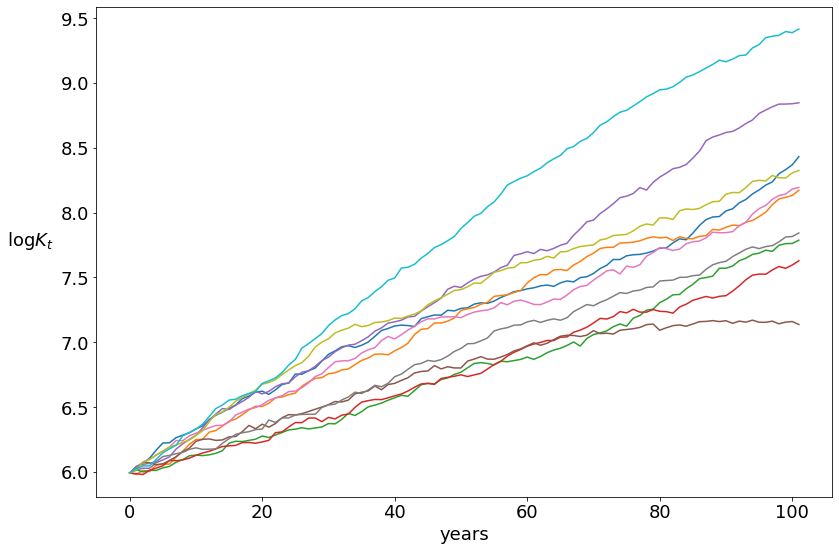

In [27]:
for p in range(10):
    plt.plot(logKt[p])
plt.xlabel('years')
plt.ylabel(r'$\logK_t$', rotation=0, labelpad=30)
# plt.savefig('k_t.png')

In [28]:
logk10 = np.zeros(102)
logk33 = np.zeros(102)
logk50 = np.zeros(102)
logk67 = np.zeros(102)
logk90 = np.zeros(102)
for t in range(102):
    logk10[t] = np.quantile(logKt[:,t], .1)
    logk33[t] = np.quantile(logKt[:,t], .33)
    logk50[t] = np.quantile(logKt[:,t], .5)
    logk67[t] = np.quantile(logKt[:,t], .67)
    logk90[t] = np.quantile(logKt[:,t], .9)

In [29]:
quantileList = [.1, .33, .5, .67, .9]

In [30]:
def get_quantile(simulation, quantileList=[.1, .33, .5, .67, .9]):
    quantileDict = dict()
    for quantile in quantileList:
        quantileDict[quantile] = np.quantile(simulation, quantile, axis=0)
        
    return quantileDict

In [31]:
logkDict = get_quantile(logKt)

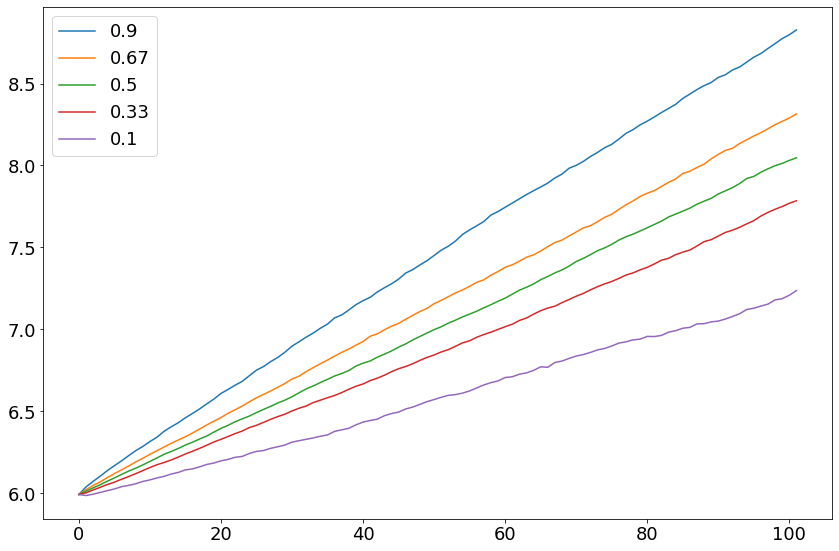

In [32]:
for quantile in reversed(quantileList):
    plt.plot(logkDict[quantile], label = quantile)
    
plt.legend()

In [33]:
def simulate_logn_withdrift(ems, lambda_u, sigma_n, dW, H = np.zeros(size)):
    _, path, time = dW.shape
    lognt = np.zeros((path, time))
    
    
    for T in range(time):
        log_n = np.zeros(path)
        for t in range(T):
            log_n += lambda_u[t] * ems[T-t] * (1+ np.dot(sigma_n, H[T-t] + dW[:, : ,T-t]) )
        lognt[:, T] = log_n
    return lognt

In [34]:
# dW = np.random.normal(0,1, size=(3,10000,102))
sigma_n = np.array([0, 0, 1.2])
# dW = np.random.normal(0,1, size=(3,1_000_000,102))
log_nt = simulate_logn_withdrift(e_base, λ_base/1000, sigma_n, dW)

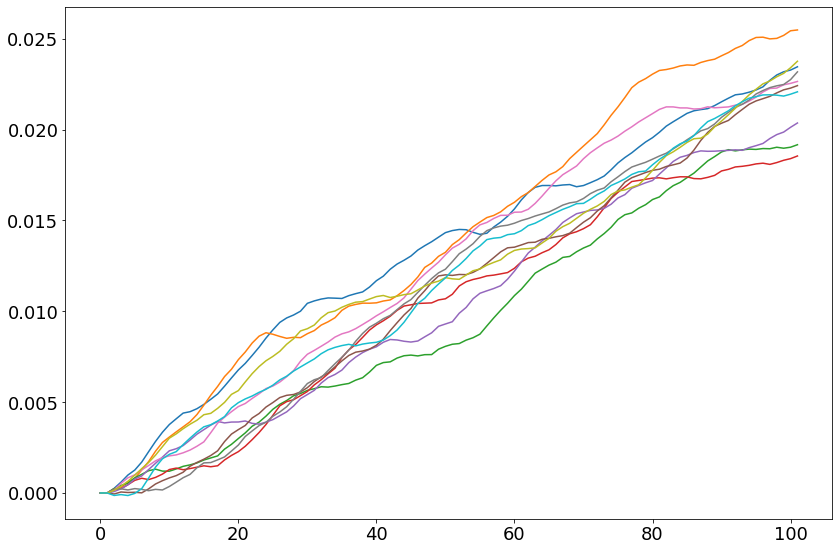

In [35]:
for p in range(10):
    plt.plot(log_nt[p])

In [36]:
logn = dict()
for quantile in [.1, .33, .5, .67, .9]:
    logn[quantile] = np.quantile(log_nt, quantile, axis=0)

Text(0, 0.5, '$\\log{N_t}$\n (scaled by 100)')

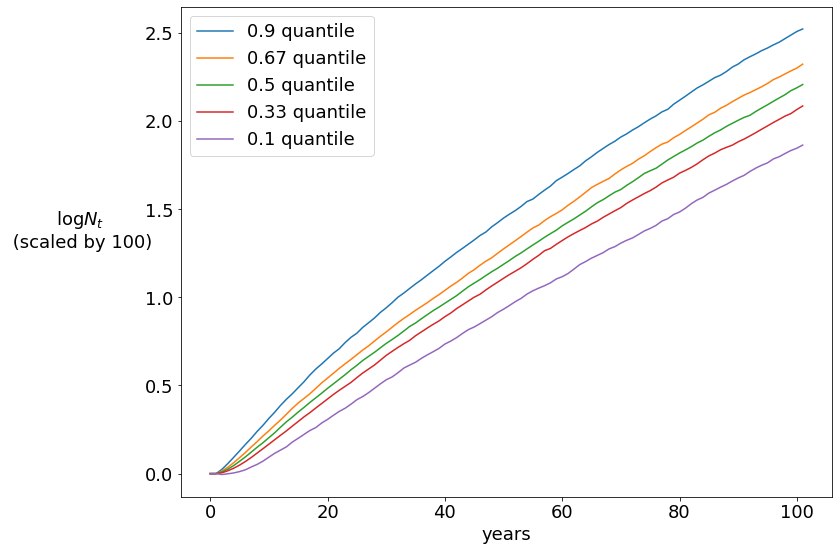

In [37]:
for quantile in [.9, .67, .5, .33, .1]:    
    plt.plot(logn[quantile]*100, label = "{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel("$\log{N_t}$\n (scaled by 100)", rotation=0, labelpad=65)
# plt.savefig("logn_quantile.png")

In [38]:
def simulate_scc(invkap, Kt, et, lognt, alpha, delta, eta):
    path, time = Kt.shape
    scct = np.zeros((path, time))
    inv = invkap
    for p in range(path):
        scct[p] = eta*(alpha - inv)*np.exp(Kt[p])/((1 - eta)*et*np.exp(lognt[p]))*1000
    return scct

In [39]:
scc_base = simulate_scc(invkap, logKt, e_base[:102], log_nt, alpha, delta, eta )

Text(0, 0.5, '$scc$')

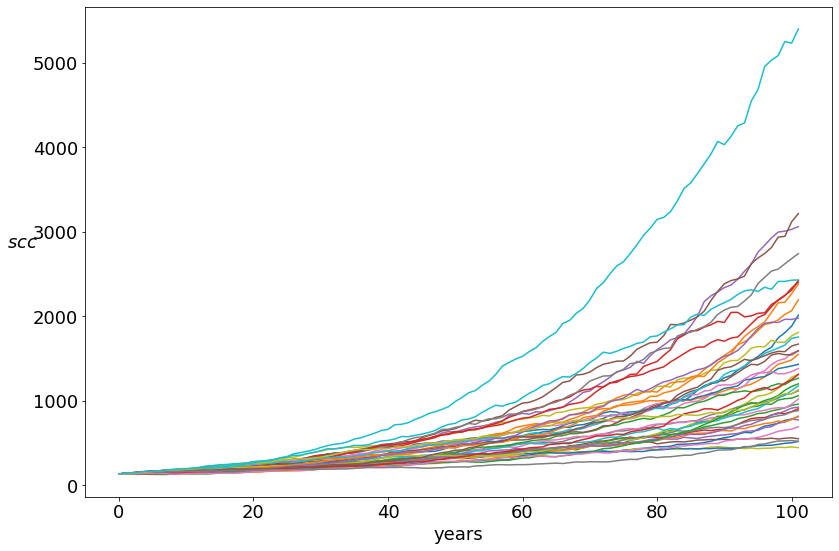

In [40]:
for p in range(40):
    plt.plot(scc_base[p])
plt.xlabel('years')
plt.ylabel(r'$scc$', rotation=0, labelpad=10)
# plt.savefig('scc_t.png')

In [41]:
scc_quantile = dict()
for quantile in [.1, .33, .5, .67, .9]:
    scc_quantile[quantile] = np.quantile(scc_base, quantile, axis=0)

NameError: name 'logk90' is not defined

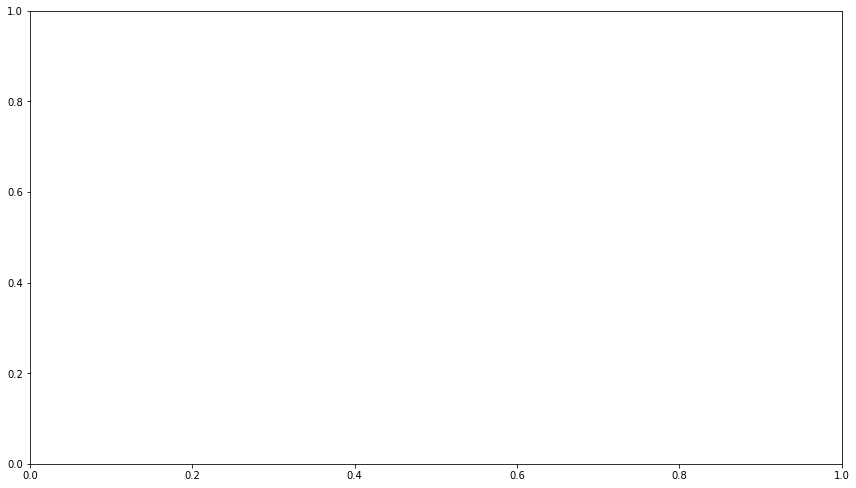

In [2]:
fig = plt.figure(figsize = (12, 20))
plt.subplot(311)
plt.plot(logk90, label = "0.9 quantile")
plt.plot(logk67, label = "0.67 quantile")
plt.plot(logk50, label = "0.5 quantile")
plt.plot(logk33, label = "0.33 quantile")
plt.plot(logk10, label = "0.1 quantile")
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{K_t}$", rotation=0, labelpad=26)
plt.title("log capital, shocks to capital and damage")
# plt.savefig("logk_quantile.png")
plt.subplot(312)
for quantile in [.9, .67, .5, .33, .1]:    
    plt.plot(logn[quantile], label = "{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel("$\log{N_t}\n (Scaled by 100)$", rotation=0, labelpad=25)
plt.title("log damage, shocks to capital and damage")
# plt.savefig("logn_quantile.png")
plt.subplot(313)
for quantile in [.9, .67, .5, .33, .1]:
    plt.plot(scc_quantile[quantile], label = "{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel("SCC", rotation=0, labelpad=20)
plt.title("SCC, shocks to capital and damage")
# plt.savefig("shock_capital_dmg2.png")

In [43]:
def simulate_scc_non(invkap, logKt, et, lognt, alpha, delta, eta):
    path, time = logKt.shape
    scct = np.zeros((path, time))
    inv = invkap
    for p in range(path):
        scct[p] = eta*(alpha - inv)*np.exp(logKt[p])/((1 - eta)*et)*1000
    return scct

In [44]:
scc_non = simulate_scc_non(invkap, logKt, e_base[:102], log_nt, alpha, delta, eta)

In [45]:
scc_non = get_quantile(scc_non)

In [46]:
scc_non[.9] == scc_quantile[.9], scc_non[.33] == scc_quantile[.33]

(array([ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, Fal

Text(0, 0.5, '$SCC$')

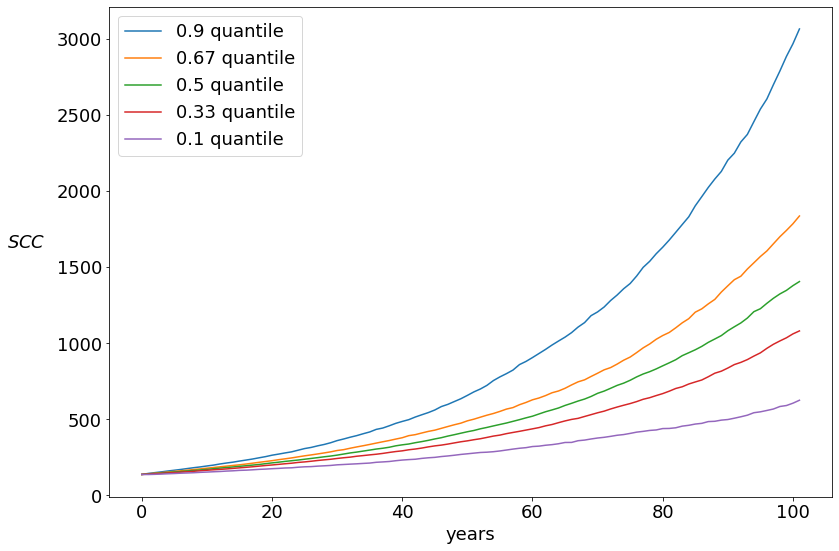

In [47]:
for quantile in reversed(quantileList):
    plt.plot(scc_non[quantile], label="{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$SCC$', rotation=0, labelpad=30)
# plt.title('SCC, no damage')

Text(0.5, 1.0, 'SCC, shocks to captial and damage')

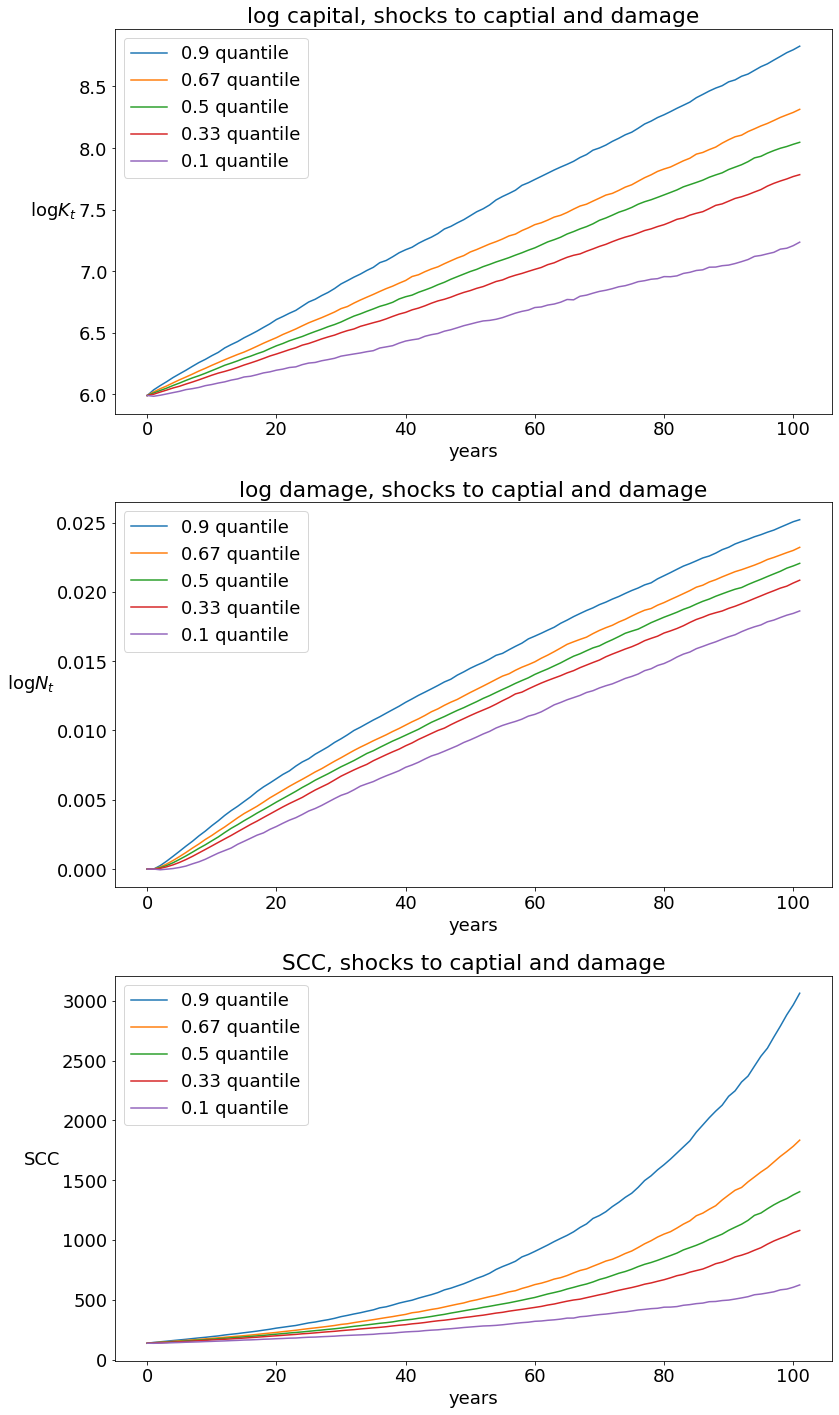

In [48]:
fig = plt.figure(figsize = (12, 20))
plt.subplot(311)
plt.plot(logk90, label = "0.9 quantile")
plt.plot(logk67, label = "0.67 quantile")
plt.plot(logk50, label = "0.5 quantile")
plt.plot(logk33, label = "0.33 quantile")
plt.plot(logk10, label = "0.1 quantile")
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{K_t}$", rotation=0, labelpad=26)
plt.title('log capital, shocks to captial and damage')
# plt.savefig("logk_quantile.png")
plt.subplot(312)
for quantile in [.9, .67, .5, .33, .1]:    
    plt.plot(logn[quantile], label = "{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{N_t}$", rotation=0, labelpad=25)
plt.title('log damage, shocks to captial and damage')
# plt.savefig("logn_quantile.png")
plt.subplot(313)
for quantile in [.9, .67, .5, .33, .1]:
    plt.plot(scc_non[quantile], label = "{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel("SCC", rotation=0, labelpad=20)
plt.title('SCC, shocks to captial and damage')
# plt.savefig("scc_quantile.png")

# single out shocks to damage

$\sigma_k' = (0, 0, 0)$

$\sigma_z' = (0, 0, 0)$

In [49]:
sigma_z0 = np.array([0, 0, 0])
z0_dmg = np.zeros(size)
zt_dmg = simulate_z(dW, z0_dmg, 0, .056, sigma_z0)

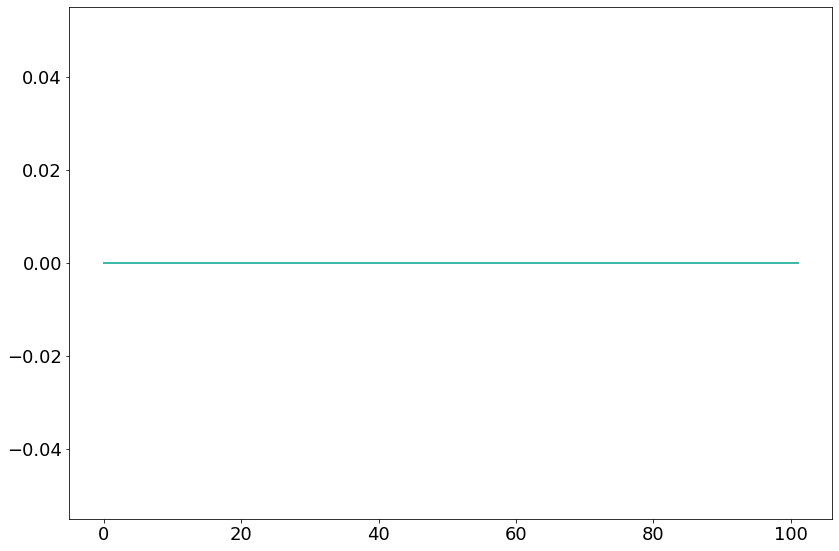

In [50]:
for p in range(1000):
    plt.plot(zt_dmg[p])

In [51]:
sigma_k0 = np.array([0, 0, 0])
logKt_dmg = simulate_logkapital(invkap, dW, zt_dmg,  alpha_k, beta, sigma_k0, kappa, k0)

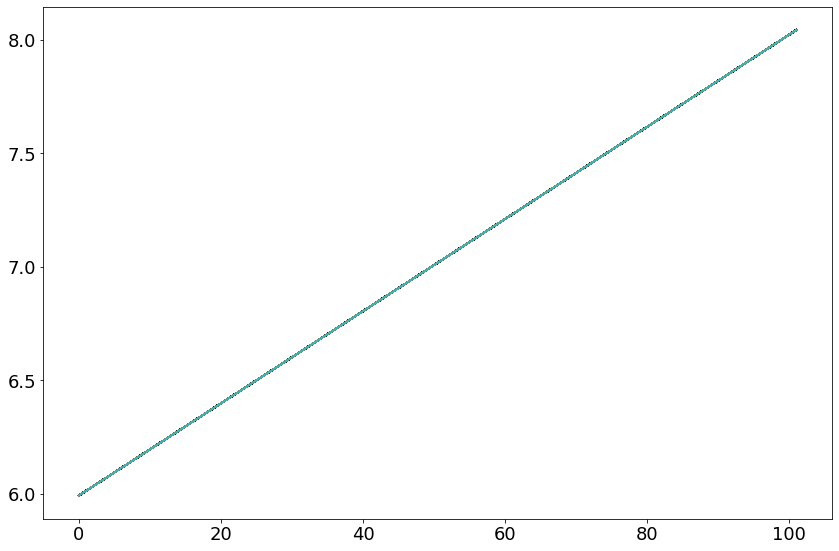

In [52]:
for path in range(1000):
    plt.plot(logKt_dmg[path])

In [53]:
logk0Dict = get_quantile(logKt_dmg)

Text(0.5, 1.0, 'log capital, shocks to damage only')

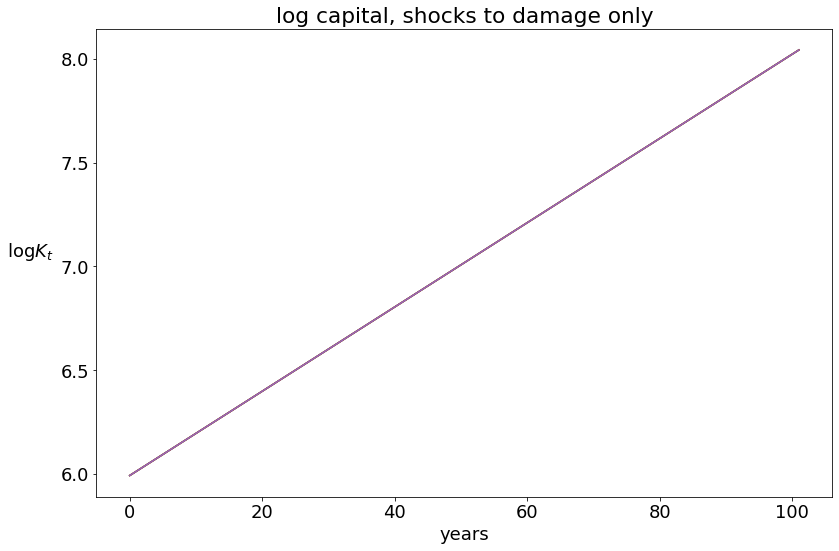

In [54]:
for quantile in reversed(quantileList):
    plt.plot(logk0Dict[quantile], label="{} quantile".format(quantile) )
# plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to damage only')

## Compute SCC -- shocks to damage only

In [55]:
sigma_n = np.array([0, 0, 1.2])
log_nt = simulate_logn_withdrift(e_base, λ_base/1000, sigma_n, dW, np.zeros(T))

In [56]:
log_ntquantileDict = get_quantile(log_nt)

Text(0, 0.5, '$\\log{N_t}$')

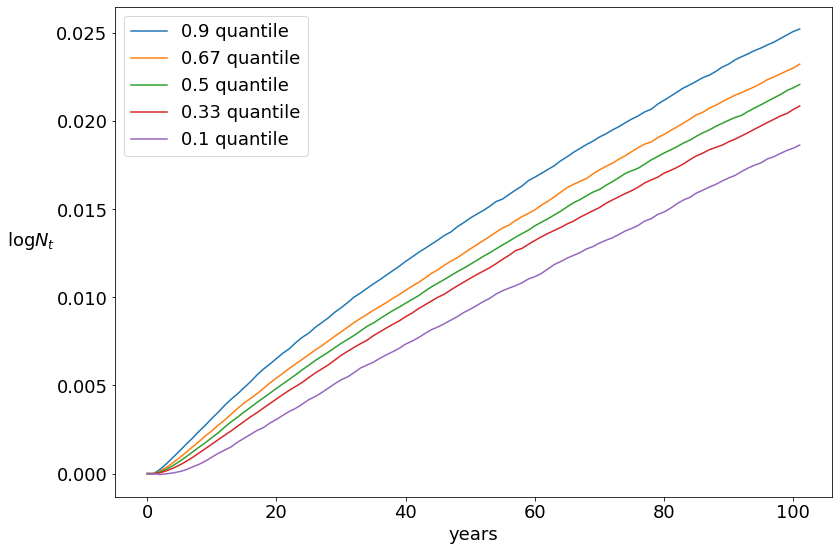

In [57]:
for quantile in reversed(quantileList):
    plt.plot(log_ntquantileDict[quantile], label="{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{N_t}$", rotation=0, labelpad=25)
# plt.savefig("logn_quantile.png")

In [58]:
scc_dmg = simulate_scc(invkap, logKt_dmg, e_base[:102], log_nt, alpha, delta, eta )

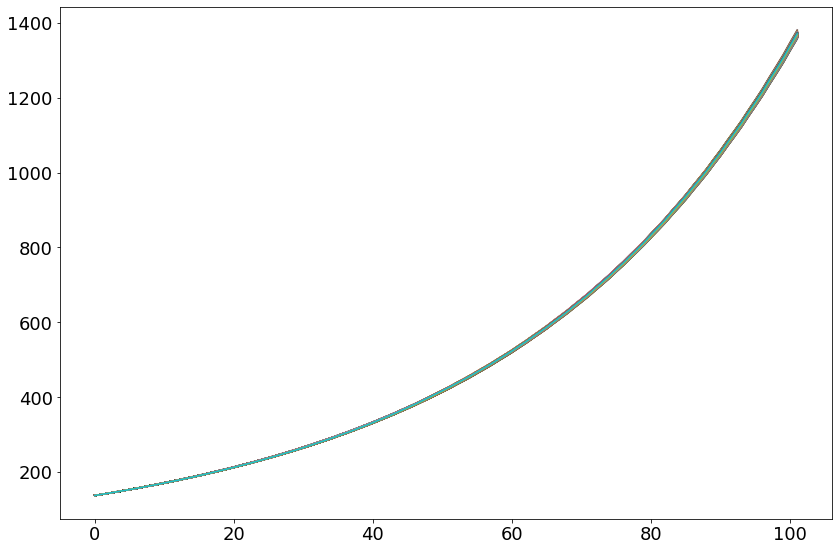

In [59]:
for p in range(1000):
    plt.plot(scc_dmg[p])

In [60]:
scc_k0quantileDict = get_quantile(scc_dmg)

Text(0.5, 1.0, 'last 3 years')

/home/suri/.pyenv/versions/ry38/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


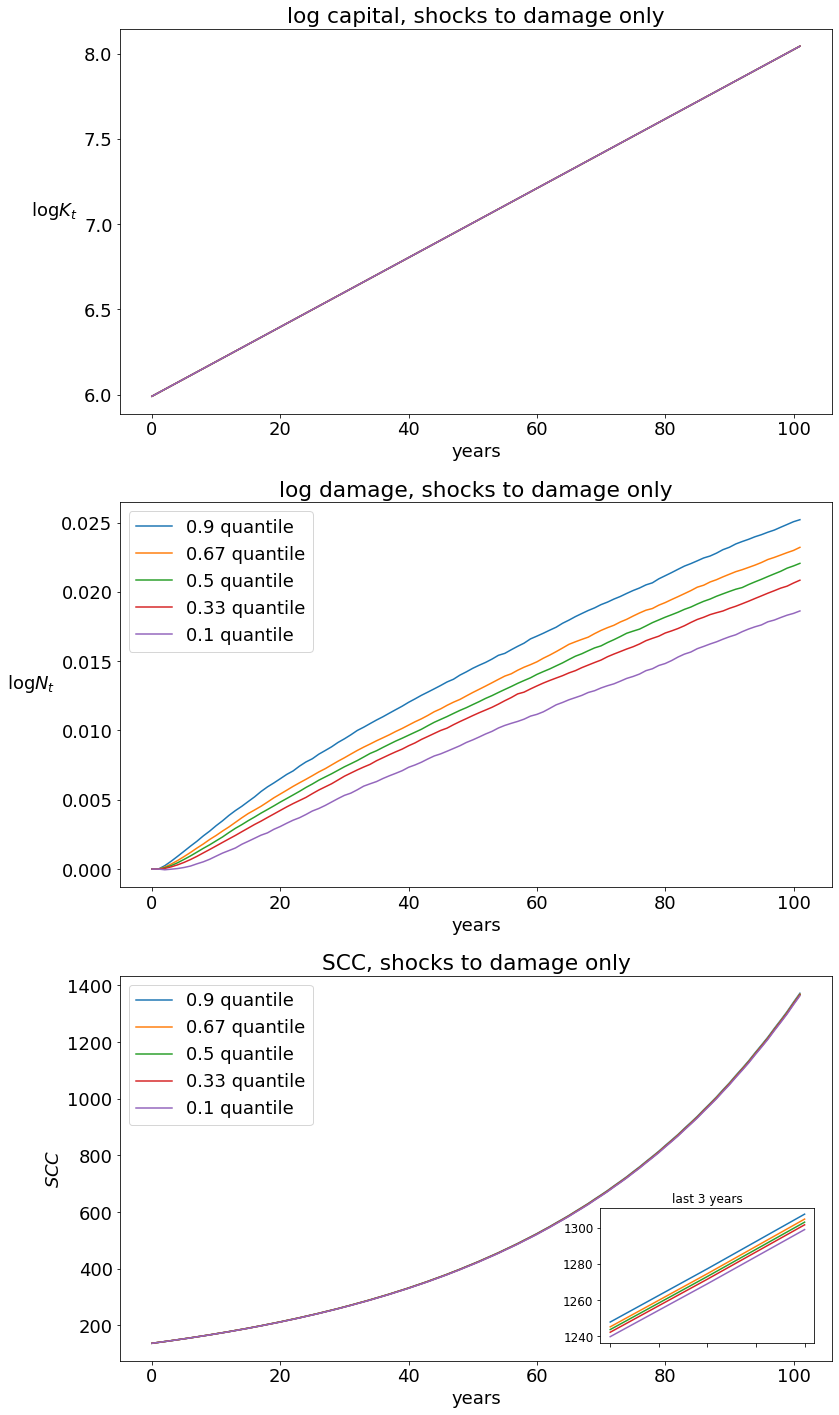

In [61]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(12,20))
plt.subplot(3,1,1)
for quantile in reversed(quantileList):
    plt.plot(logk0Dict[quantile], label="{} quantile".format(quantile) )
# plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to damage only')

plt.subplot(3,1,2)


for quantile in reversed(quantileList):
    plt.plot(log_ntquantileDict[quantile], label="{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{N_t}$', rotation=0, labelpad=30)
plt.title('log damage, shocks to damage only')


ax = plt.subplot(3,1,3)
for quantile in reversed(quantileList):
    ax.plot(scc_k0quantileDict[quantile], label='{} quantile'.format(quantile))
ax.legend()
ax.set_xlabel("years")
ax.set_ylabel(r'$SCC$')
ax.set_title('SCC, shocks to damage only')

axins4 = inset_axes(ax, width="30%", height="35%", loc=4, borderpad=1)

for quantile in reversed(quantileList):
    axins4.plot(scc_k0quantileDict[quantile][-5:-2], label='{} quantile'.format(quantile))
   # Values in (-0.5, 0.0) zooms in to center
axins4.tick_params(labelleft=True, labelbottom=False, labelsize=12)
axins4.set_title('last 3 years', fontsize=12)
# plt.savefig('shock_dmg2.png')

## Single out shocks to damage and long term risk

In [62]:
sigma_n0 = np.array([0,0,0])
logn0 = simulate_logn_withdrift(e_base_102, λ_base/1000, sigma_n0, dW, np.zeros(T))

In [63]:
logn0Dict = get_quantile(logn0)

Text(0.5, 1.0, 'log damage, shocks to capital only')

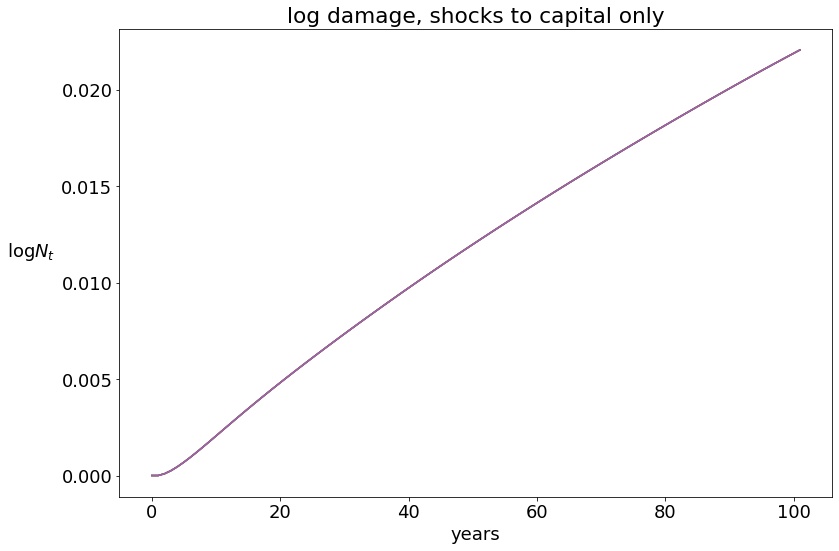

In [64]:
for quantile in reversed(quantileList):
    plt.plot(logn0Dict[quantile], label = quantile)
plt.xlabel('years')
plt.ylabel(r'$\log{N_t}$', rotation=0, labelpad=30)
plt.title('log damage, shocks to capital only')

In [65]:
scc_n0 = simulate_scc(invkap, logKt, e_base_102, logn0, alpha, delta, eta )

In [66]:
scc_n0quantileDict = get_quantile(scc_n0)

Text(0.5, 1.0, 'SCC, no shocks to damage')

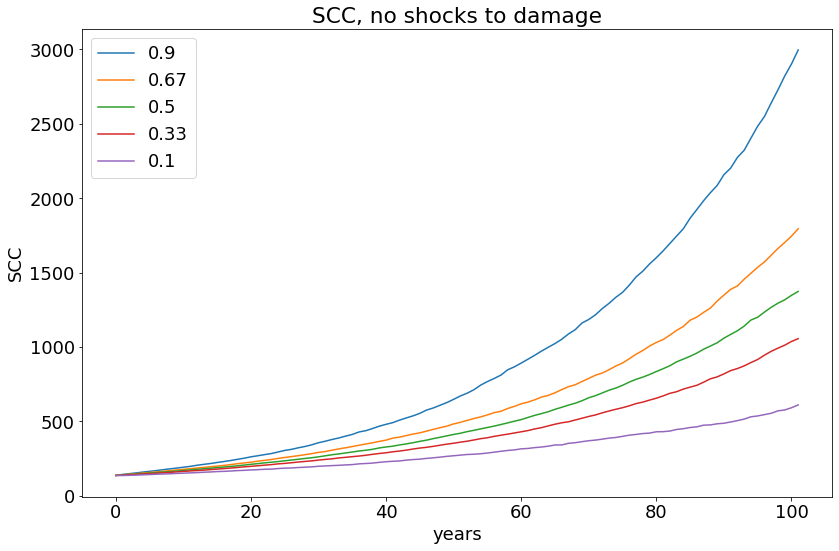

In [67]:
for quantile in reversed(quantileList):
    plt.plot(scc_n0quantileDict[quantile], label = quantile)
plt.legend()
plt.xlabel('years')
plt.ylabel('SCC')
plt.title('SCC, no shocks to damage')

# shocks to capital only
$\sigma_k' = (0.019,0,0)$

$\sigma_z' = (0.044, 0, 0)$

In [68]:
sigma_z10 = np.array([0.044, 0, 0])
sig_z0 = np.sqrt(0.044**2/(1 - (1-.056)**2))
print(sig_z0)
z0 = np.random.normal(0, sig_z0, size = (size))
z10 = simulate_z(dW, z0, 0, .056, sigma_z10)

0.13335537736643974


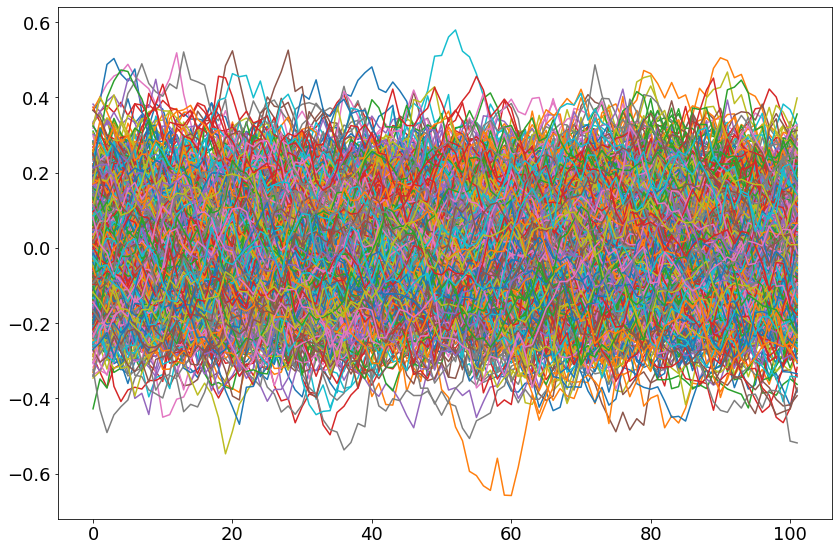

In [69]:
for p in range(1000):
    plt.plot(z10[p])

In [70]:
sigma_k10 = np.array([0.019, 0, 0])
logKt10 = simulate_logkapital(invkap, dW, z10, alpha_k, beta, sigma_k10, kappa, k0)

In [71]:
logk10quantileDict = get_quantile(logKt10)

Text(0.5, 1.0, 'log capital, shocks to damage only')

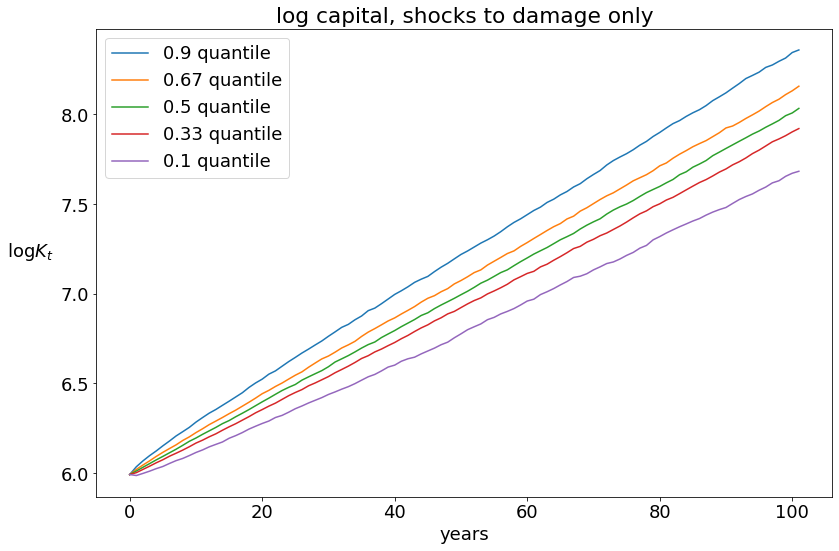

In [72]:
for quantile in reversed(quantileList):
    plt.plot(logk10quantileDict[quantile], label="{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to damage only')

In [73]:
scc_k10 = simulate_scc(invkap, logKt10, e_base[:102], logn0, alpha, delta, eta )

In [74]:
scc_z01quantileDict = get_quantile(scc_k10)

Text(0, 0.5, '$SCC$')

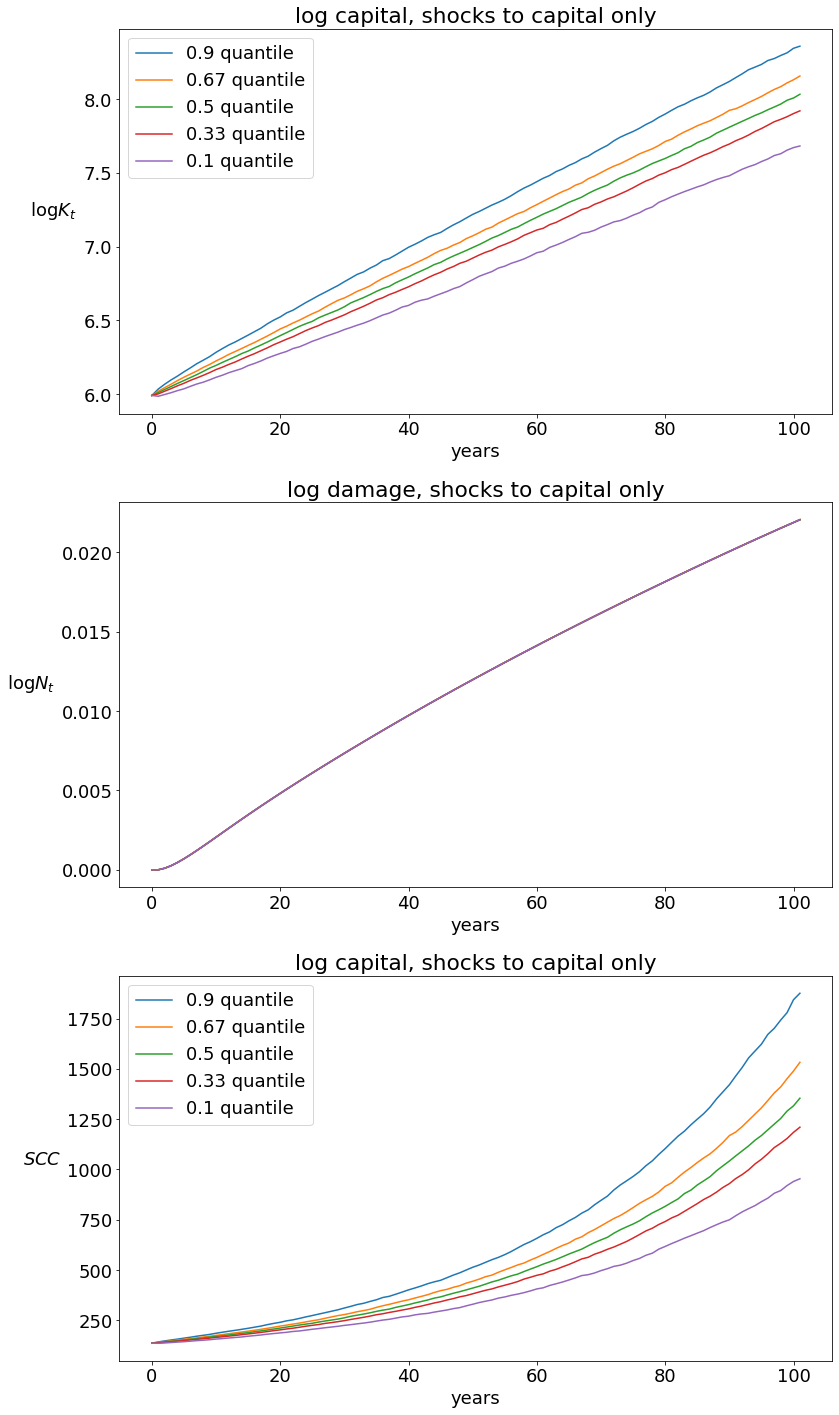

In [75]:
fig = plt.figure(figsize=(12,20))

plt.subplot(3,1,1)
for quantile in reversed(quantileList):
    plt.plot(logk10quantileDict[quantile], label="{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to capital only')

plt.subplot(3,1,2)

for quantile in reversed(quantileList):
    plt.plot(logn0Dict[quantile], label = quantile)
plt.xlabel('years')
plt.ylabel(r'$\log{N_t}$', rotation=0, labelpad=30)
plt.title('log damage, shocks to capital only')

plt.subplot(3,1,3)

for quantile in reversed(quantileList):
    plt.plot(scc_z01quantileDict[quantile], label="{} quantile".format(quantile))# plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to capital only')
plt.legend()
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$SCC$", rotation=0, labelpad=25)
# plt.savefig("shock_capital2.png")

# tenuous belief check

$\hat \alpha_k = -.05 $  and $.01\hat \sigma_k =  .484$

$ \hat\alpha_c = 0.484$  and $\hat \beta_c = 1 $

$\hat\alpha_z = 0 $ and $\hat\beta_z = .014$

and compute coefficient for consumption:
$$
\begin{aligned}
    \hat \alpha_c &= 100(i^* - \frac{\kappa}{2} (i^*)^2) + \alpha_k - \frac{(.01\sigma_k)^2}{2} \\
                  &\backsim 100*.019
\end{aligned}
$$

The consumption process:
$$
dlogC_t = (\alpha_c + \beta_c z)dt + \sigma_c dWt
$$

The Z process:
$$
dZ_t = (\alpha_z - \beta_z Z)dt + \sigma_z dW_t
$$

with  $\sigma = \begin{bmatrix} .477, & 0\\
                                .011, & .025\end{bmatrix}$

In [76]:
# alpha_c = .484*4*0.01
# beta_c = .04
T = 102
size = 1_000_000
dW = np.random.normal(0,1,size=(3, size, T))

In [77]:
sig_z = np.sqrt((.044**2 + .1**2)/(1 - (1 - .014)**2))
sig_z

0.6552028308336593

In [78]:
Z0 = np.random.normal(0, sig_z, size=(size))

In [79]:
sigma_z = np.array([.044, .1, 0])
Zt = simulate_z(dW, Z0, 0, .014, sigma_z)

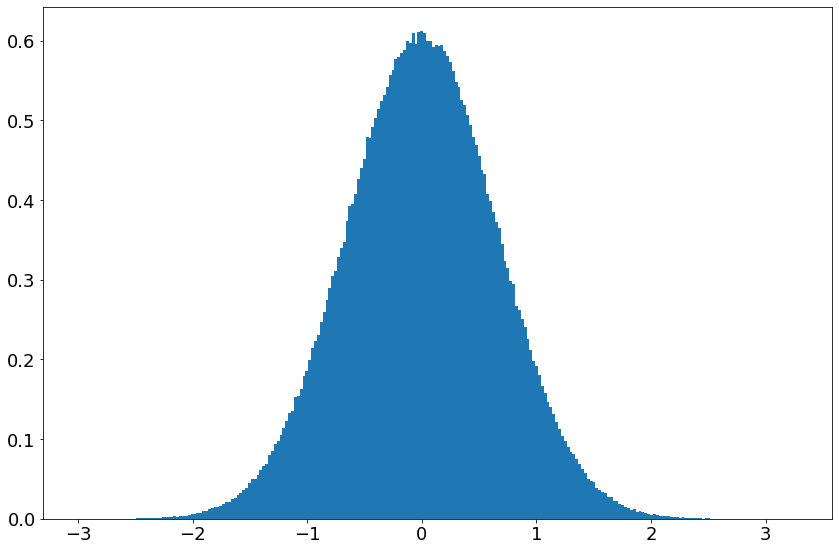

In [80]:
plt.hist(Zt[:,0], bins=250, density=True)
plt.show()

In [169]:
1 -  (1 - .014)**4

0.05483493758400004

In [81]:
np.std(Zt[:,0])

0.6557683922007665

In [82]:
ZtQuant = get_quantile(Zt, quantileList=[.1, .9])

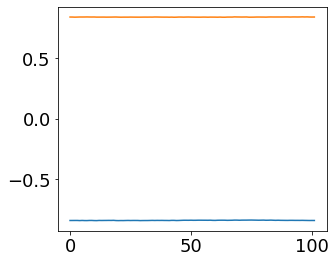

In [83]:
fig = plt.figure(figsize=(5,4))
plt.plot(ZtQuant[.1])
plt.plot(ZtQuant[.9])

In [84]:
def simulateLogConsumption(zt, dW, alpha_c, beta_c, sigma_c):
    _, path, time = dW.shape
    logct = np.zeros((path, time))
    logc = np.zeros(path)
    for t in range(time-1):
        logc += alpha_c + beta_c*zt[:,t] + np.dot(sigma_c,dW[:,:,t])
        logct[:, t+1] = logc
    return logct

In [85]:
sigma_c = np.array([.477*4/100, 0, 0])
# alpha_c = .484*4/100
alpha_cc =  100*(.125 -  7/2*.125**2) - .05*100  - (.019)**2/2
alpha_cc/100, alpha_cc,.477*4*.01

(0.020310695, 2.0310695, 0.01908)

In [86]:
dW.shape

(3, 1000000, 102)

In [87]:
sigma_c = np.array([.477*4, 0, 0])
logCt = simulateLogConsumption(Zt, dW, alpha_cc, 1, sigma_c)

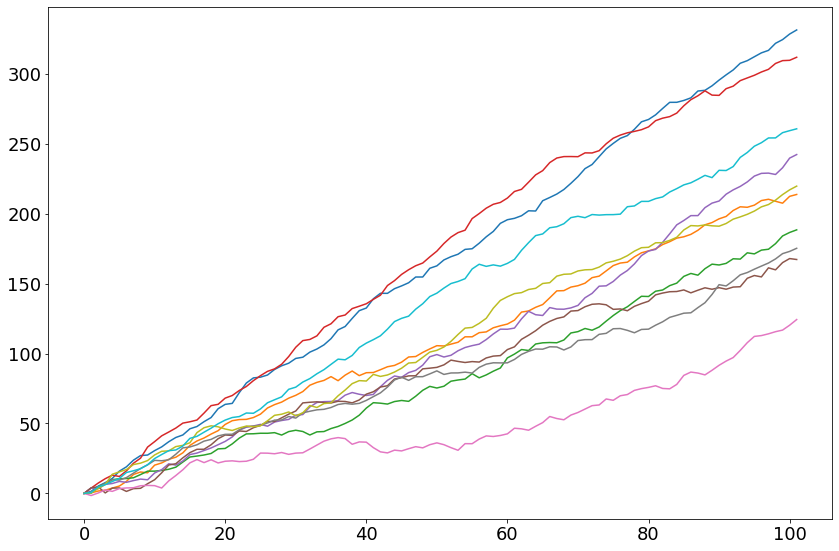

In [88]:
for i in range(10):
    plt.plot(logCt[i])

In [89]:
Zt[0,:3]

array([0.7294164 , 0.76809205, 0.84035145])

In [90]:
sigma_z = np.array([.044, .1, 0])
np.dot(sigma_z, dW[:, 0, :3])

array([0.04888748, 0.08301269, 0.00508049])

In [91]:
logCtQuantile = get_quantile(logCt, quantileList=[.1, .9])

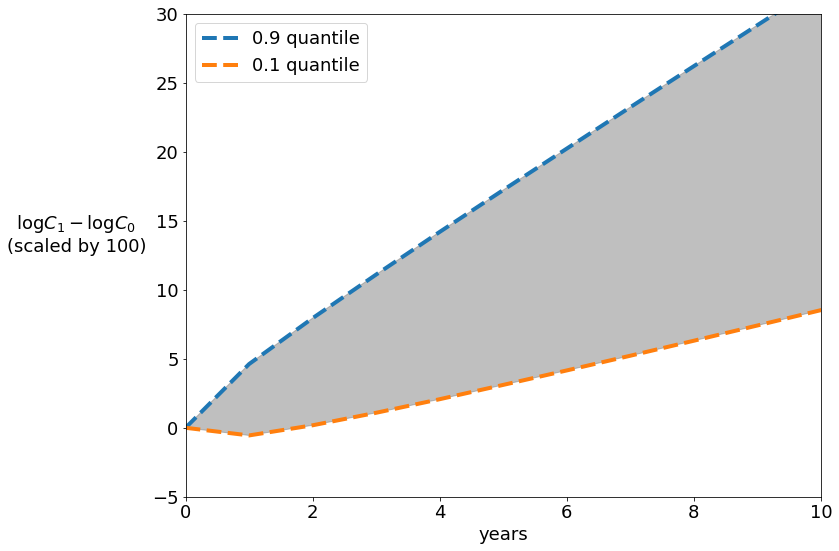

In [92]:
for quantile in [.9, .1]:
    plt.plot(logCtQuantile[quantile], label="{} quantile".format(quantile) , linestyle="dashed", linewidth=4)

plt.fill_between(x=np.arange(0,102), y1=logCtQuantile[.1], y2=logCtQuantile[.9], color="gray", alpha=.5)
plt.legend()
plt.xlabel('years')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
plt.ylim(-5,30)
plt.xlim(0,10)
plt.savefig("consumption_growth10.png")

In [93]:
import pandas as pd

In [94]:
arry = np.array([logCtQuantile[.1][:11],logCtQuantile[.9][:11]])

In [95]:
arry.shape

(2, 11)

In [96]:
print('quantiles for logCt')
pd.DataFrame(arry, index=[".1 quantile", ".9 quantile"]).round(2)

quantiles for logCt


0     1     2      3      4      5      6      7      8      9   \
.1 quantile  0.0 -0.55  0.18   1.09   2.07   3.11   4.16   5.22   6.31   7.41   
.9 quantile  0.0  4.62  7.94  11.10  14.19  17.23  20.23  23.23  26.20  29.17   

                10  
.1 quantile   8.52  
.9 quantile  32.14

In [97]:
zarray = np.array([ZtQuant[.1], ZtQuant[.9]])

In [98]:
print('quantiles for z')
pd.DataFrame(zarray[:,:11], index=[".1 quantile", ".9 quantile"]).round(2)

quantiles for z


0     1     2     3     4     5     6     7     8     9     10
.1 quantile -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84 -0.84
.9 quantile  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84  0.84

In [99]:
np.quantile(dW[0,:,0], .1)

-1.281802651925569

In [100]:
dW.shape

(3, 1000000, 102)

In [101]:
.02 + .04*(-.42) + .019*(-1.3)

-0.0215

In [102]:
np.std(dW[0,:,0])

0.9993166160875337

In [103]:
np.std(Zt[:,50])

0.6548889524893938

In [104]:
Zt[0][:3]

array([0.7294164 , 0.76809205, 0.84035145])

In [105]:
dW[:,0,0][0]*sigma_z[0] + dW[:,0,0][1]*sigma_z[1]

0.04888747538402842

In [106]:
np.dot(sigma_z, dW[:,0, :3])

array([0.04888748, 0.08301269, 0.00508049])

In [107]:
dW[:,0,1][0]*sigma_z[0] + dW[:,0,1][1]*sigma_z[1]

0.0830126938002291

In [108]:
 0.02224217*(1 - .056) + dW[:,0,0][0]*sigma_z[0] + dW[:,0,0][1]*sigma_z[1]

0.06988408386402842

In [109]:
(0.02224217*.04 + .0203 +  dW[:,0,0][0]*sigma_c[0])  -0.1323532*.04 + .0203 + dW[:,0,1][0]*sigma_c[0]

-0.3477461210534357

In [110]:
logCt[0,:3]

array([0.        , 1.42523871, 5.17570577])

In [111]:
arry10 = np.array([logCtQuantile[.1][-11:],logCtQuantile[.9][-11:]])

In [112]:
(pd.DataFrame(arry10)).round(2)

0       1       2       3       4       5       6       7       8   \
0  112.18  113.55  114.94  116.30  117.71  119.16  120.55  121.97  123.39   
1  257.61  260.28  262.93  265.58  268.23  270.87  273.54  276.19  278.82   

       9       10  
0  124.83  126.24  
1  281.47  284.11

(0.0, 100.0)

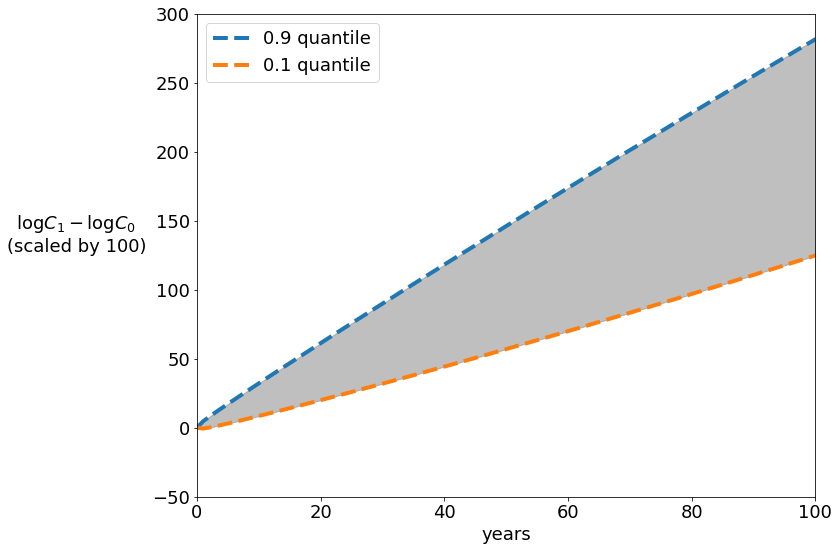

In [166]:
for quantile in [.9, .1]:
    plt.plot(logCtQuantile[quantile], label="{} quantile".format(quantile) , linestyle="dashed", linewidth=4)

plt.fill_between(x=np.arange(0,102), y1=logCtQuantile[.1], y2=logCtQuantile[.9], color="gray", alpha=.5)
plt.legend()
plt.xlabel('years')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
plt.ylim(-50,300)
plt.xlim(0,100)
# plt.savefig("consumption_growth100.png")

# Quarterly simulation

In [114]:
alpha_c = .484
alpha_c
dWW = np.random.normal(0, 1, size = (2, 2_000_000, 42))

In [115]:
sigma_zz = np.array([.011, .025])
ZZ0 = np.random.normal(0, .163, size=(2_000_000))
ZZt = simulate_z(dWW, ZZ0, 0, .014, sigma_zz)

In [116]:
ZZtQuant = get_quantile(ZZt, quantileList=[.1,.9])

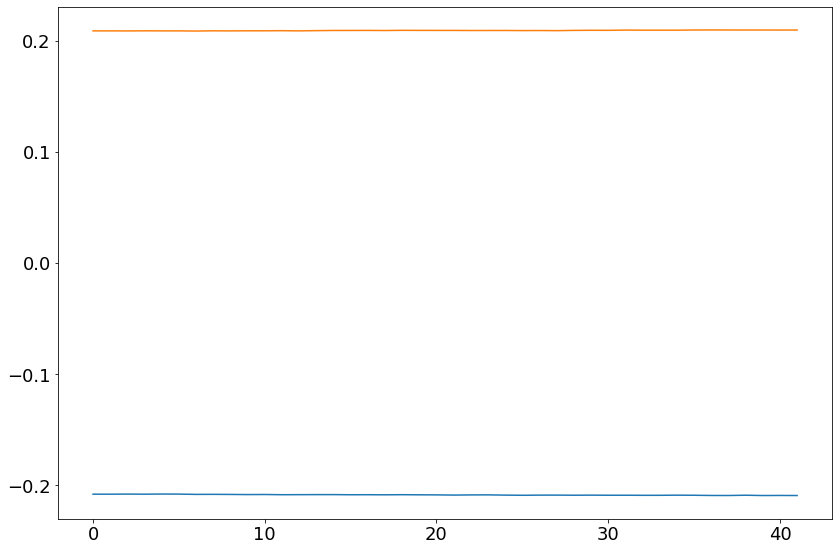

In [117]:
plt.plot(ZZtQuant[.1])
plt.plot(ZZtQuant[.9])

In [118]:
sigma_c = np.array([.477, 0])
alpha_c =.484
logCCt = simulateLogConsumption(ZZt, dWW, .484, 1, sigma_c)

logCCtQuantile = get_quantile(logCCt, quantileList=[.1, .9])

In [119]:
logCCt.shape

(2000000, 42)

Text(0, 0.5, '$\\logC_1 - \\logC_0$ \n(scaled by 100)')

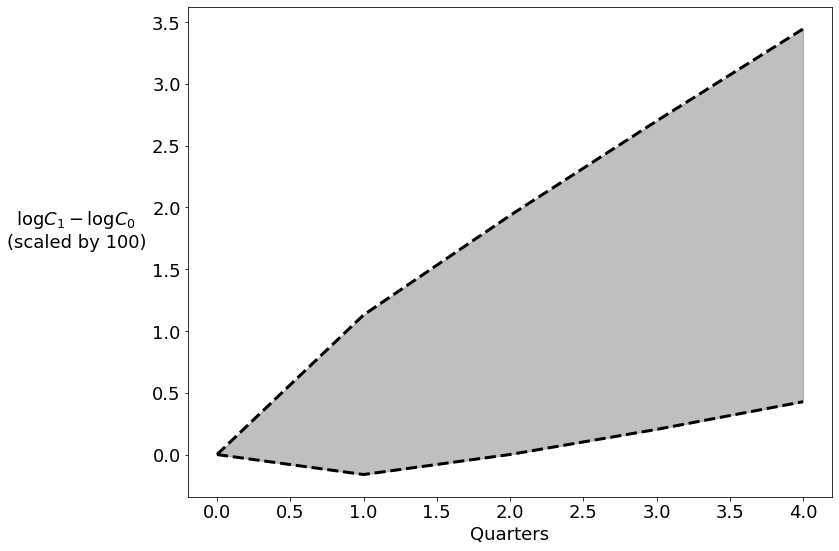

In [120]:
for quantile in [.9, .1]:
    plt.plot(logCCtQuantile[quantile][:5], label="{} quantile".format(quantile) , color="black", linestyle="dashed", linewidth=3)

plt.fill_between(x=np.arange(0,5), y1=logCCtQuantile[.1][:5], y2=logCCtQuantile[.9][:5], color="gray", alpha=.5)
# plt.legend()
plt.xlabel('Quarters')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
# plt.ylim(-5,30)
# plt.xlim(0,40)
# plt.savefig('consumption_growth010.png')

(0.0, 40.0)

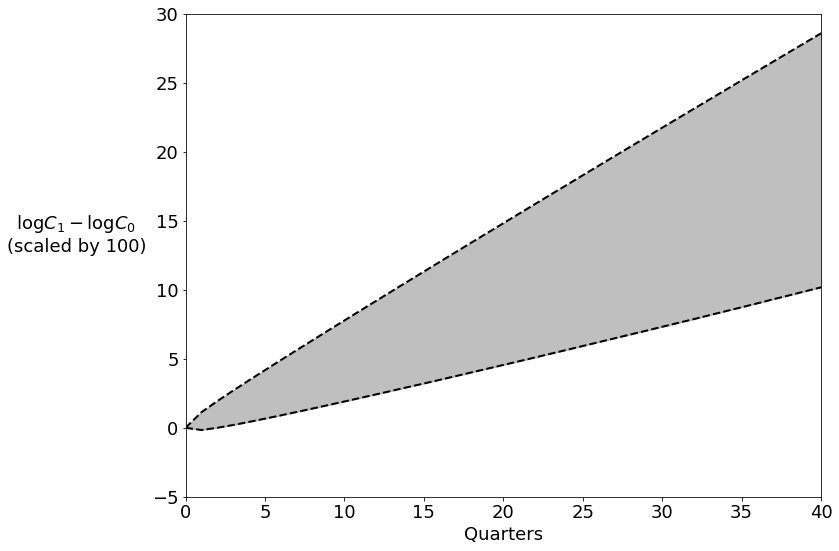

In [121]:
for quantile in [.9, .1]:
    plt.plot(logCCtQuantile[quantile], label="{} quantile".format(quantile) , color="black", linestyle="dashed", linewidth=2)

plt.fill_between(x=np.arange(0,42), y1=logCCtQuantile[.1], y2=logCCtQuantile[.9], color="gray", alpha=.5)
# plt.legend()
plt.xlabel('Quarters')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
plt.ylim(-5,30)
plt.xlim(0,40)
# plt.savefig('consumption_quarter.png')

In [122]:
logCCtQuantile[.1][4], logCCtQuantile[.9][4]

(0.4274774710745908, 3.444396315047046)

In [123]:
years = np.array([i*4 for i in range(10+1)])
years

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40])

In [124]:
print('logCt quantiles for 10 years, quarterly simulation')
pd.DataFrame([logCCtQuantile[.1][years], logCCtQuantile[.9][years]], index=['.1 quantile', '.9 quantile']).round(2)

logCt quantiles for 10 years, quarterly simulation


0     1     2     3      4      5      6      7      8      9   \
.1 quantile  0.0  0.43  1.40  2.42   3.48   4.55   5.65   6.76   7.87   9.02   
.9 quantile  0.0  3.44  6.35  9.20  12.02  14.82  17.59  20.36  23.11  25.85   

                10  
.1 quantile  10.17  
.9 quantile  28.57

In [125]:
print('logCt quantiles for first 4 quarters')
pd.DataFrame([logCCtQuantile[.1][:5], logCCtQuantile[.9][:5]], index=['.1 quantile', '.9 quantile'], 
             columns=["0", 'quarter 1', 'quarter 2', 'quarter 3 ', 'quarter 4' ]).round(3)

logCt quantiles for first 4 quarters


0  quarter 1  quarter 2  quarter 3   quarter 4
.1 quantile  0.0     -0.162      0.001       0.203      0.427
.9 quantile  0.0      1.129      1.935       2.699      3.444

In [126]:
ZZtQuant = get_quantile(ZZt, quantileList=[.1,.9])

In [127]:
print('z quantiles for 10 years, , quarterly simulation')
pd.DataFrame([ZZtQuant[.1][years], ZZtQuant[.9][years ]], index=['.1 quantile', '.9 quantile']).round(2)

z quantiles for 10 years, , quarterly simulation


0     1     2     3     4     5     6     7     8     9     10
.1 quantile -0.21 -0.21 -0.21 -0.21 -0.21 -0.21 -0.21 -0.21 -0.21 -0.21 -0.21
.9 quantile  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21  0.21

Text(0, 0.5, '$\\logC_1 - \\logC_0$ \n(scaled by 100)')

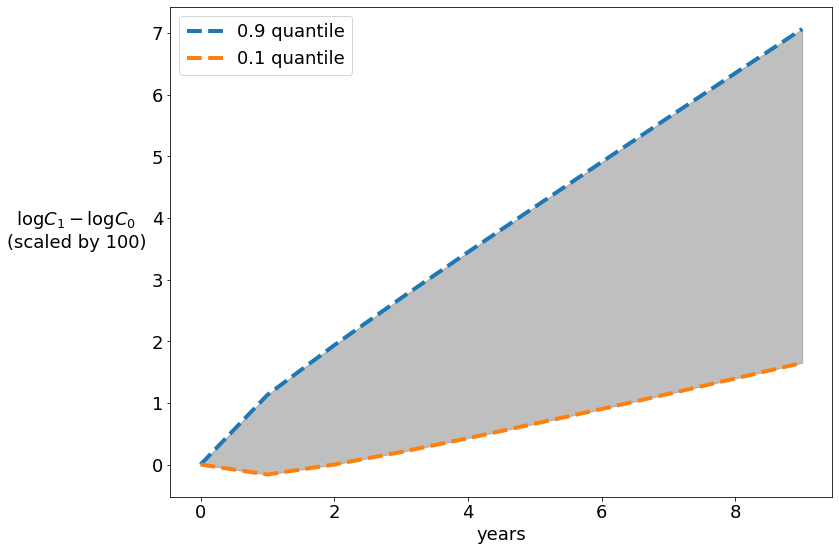

In [128]:
for quantile in [.9, .1]:
    plt.plot(logCCtQuantile[quantile][:10], label="{} quantile".format(quantile) , linestyle="dashed", linewidth=4)

plt.fill_between(x=np.arange(0,10), y1=logCCtQuantile[.1][:10], y2=logCCtQuantile[.9][:10], color="gray", alpha=.5)
plt.legend()
plt.xlabel('years')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
# plt.savefig('consumption_growth0100.png')

# Compute implied distortion for logk, z and n
$$
\sigma_k' h^* = - \frac{v_k \sigma_k'\sigma_k + \frac{d \psi (z)}{dz} \cdot \sigma_k' \sigma_z}{\xi_m}
$$
where
$$
v_k = 1 - \eta
$$

Extract k, y and min-max problem:
$$
\delta \phi(r) + \delta \psi(z) =  \delta[(1 - \eta) \log{(\alpha - i^*)} + \eta \log{e^*} - \iota_1 z] - \frac{\xi_m}{2} (h^*)'h^* + v_k(\mu_k(z) + i^* - \frac{\kappa}{2}(i^*)^2 - \sigma_k^2/2 ) + v_y'\Theta e^* - \frac{d\phi}{dr}e^* + \frac{d\psi}{dz}\mu_z(z) + \frac{1}{2}trace(\sigma_z' \frac{d^2 \psi}{dz^2} \sigma_z) 
$$

set
$$
\tau_1 = - v_y'\Theta = median * \gamma_{base}
$$

In equilibrium $e^*$ satisfies:
$$
- \tau_1 e^*  - \frac{d\phi}{dr}e^* =   \tau_2 (e^*)^2 - \delta \eta 
$$

The ODE:
$$
\delta \psi(z) =   - \frac{\frac{d\psi}{dz} v_k (\sigma_k'\sigma_z + \sigma_z'\sigma_k ) + (\frac{d\psi}{dz})^2 \sigma_z'\sigma_z }{2\xi_m} + \frac{d\psi}{dz} \mu_z(z)  + \frac{1} {2}\frac{d^2 \psi}{dz^2}\sigma_z' \sigma_z + \delta[(1 - \eta) \log{(\alpha - i^*)}  - \iota_1 z]  + v_k(\mu_k(z) + i^* - \frac{\kappa}{2}(i^*)^2 - \sigma_k^2/2 )
$$

Temporarily set $\iota_2 = 0$

The $\psi(z)$ is linear in $z$:
$$
\psi(z) = v_z z + v_0
$$

If we know that $\psi(z) = v+z\cdot z + v_0$

coefficient of z should be 0:

$$
 - \delta v_z z  +  v_k\cdot (\beta_k - \iota_2) z + v_z\cdot(- \beta_z z) = 0 
$$

$$
- \delta v_z z - .056 v_z z  + .01 (1 - \eta)z = 0
$$

$$
\begin{aligned}
 v_z = \frac{.01(1 - \eta)}{\delta + .056}
\end{aligned}
$$
Thus
$$
v_z = \frac{ -\delta \iota_2  + v_k \beta_k}{\delta + \kappa} = (1 - .032)\cdot .01 /(.008 + .056)
$$

In [129]:
def plot_quantile(quantDict, quantileList = [.1, .33, .5, .67, .9]):
    for quantile in reversed(quantileList):
        plt.plot(quantDict[quantile], label="{} quantile".format(quantile))
    plt.legend()

In [130]:
sigma_k = np.array([.019, 0, 0])
sigma_z = np.array([.044, .1, 0])

xi_m = .00256
i = .125

In [150]:
alpha_z = 0.
beta_z = .056
sigma_z = np.array([.044, .1, 0])

In [132]:
alpha_k = -.05
beta_k = .01
kappa = 7
k0 = 80/alpha
sigma_k = np.array([.019, 0, 0])

In [151]:
v_z = beta_k*(1 - eta)/(delta + beta_z)
v_k = 1 - eta
v_z, v_k

(0.15125, 0.968)

In [155]:
h_raw = - (v_k*sigma_k + v_z*sigma_z)/xi_m
h_raw

array([-9.78398437, -5.90820312, -0.        ])

In [156]:
h_capital = np.dot(sigma_k, h_raw)
h_capital

-0.18589570312499998

In [157]:
h_z = np.dot(sigma_z, h_raw)
h_z

-1.021315625

In [158]:
x = np.zeros((size,3))
Ht = np.array([h_capital, h_z, 0])
Ht

array([-0.1858957 , -1.02131562,  0.        ])

In [159]:
x[:] = h_raw

In [160]:
np.dot(sigma_k, x.T)

array([-0.1858957, -0.1858957, -0.1858957, ..., -0.1858957, -0.1858957,
       -0.1858957])

In [161]:
sig_z = np.sqrt((.044**2+ .1**2)/(1 - (1-.056)**2))
print(sig_z)
z0 = np.random.normal(0, sig_z, size=(size))
Z_d = simulate_z(dW, z0, 0, 0.056, sigma_z, x.T)
ZtQuant_d = get_quantile(Z_d, quantileList=[.1, .9])

0.3311214088807384


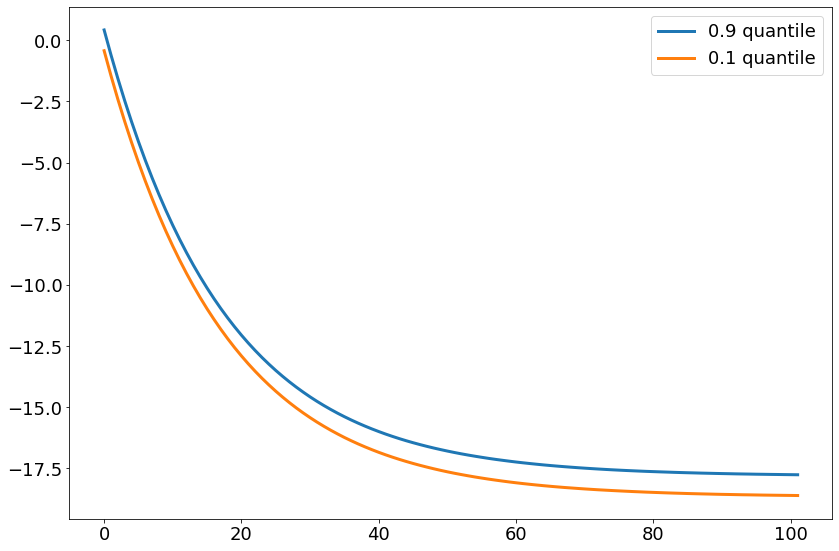

In [162]:
plot_quantile(ZtQuant_d, quantileList=[.1, .9])

In [163]:
alpha_k, beta_k,sigma_k

(-0.05, 0.01, array([0.019, 0.   , 0.   ]))

In [164]:
logK_d = simulate_logkapital(invkap, dW, Z_d, alpha_k + h_capital, beta_k, sigma_k, kappa, k0)
logKQuant_d = get_quantile(logK_d)

Text(0, 0.5, '$\\log{K_t}$')

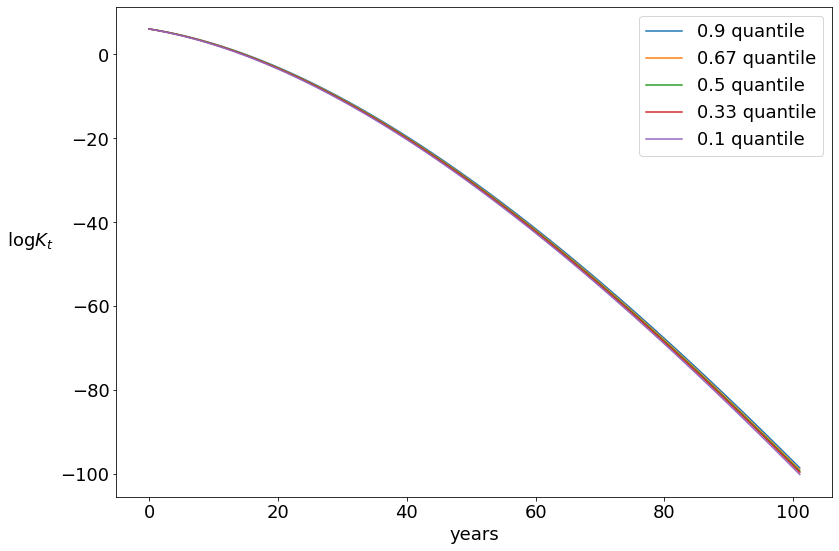

In [144]:
plot_quantile(logKQuant_d)
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
# plt.title('SCC, no damage')

In [145]:
sigma_n = np.array([0, 0, 1.2])
log_n = simulate_logn_withdrift(e_base_102, λ_base/1000, sigma_n, dW, h_hat_base)

In [146]:
log_n_quantile = get_quantile(log_n)

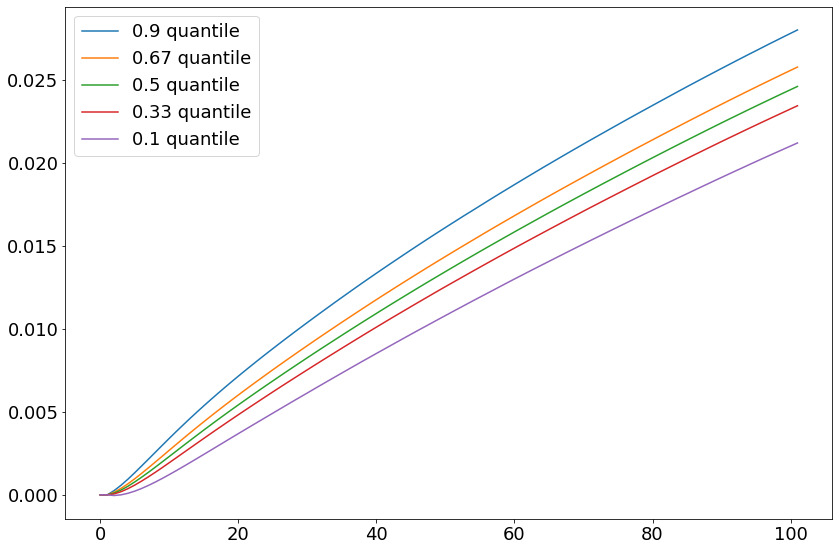

In [147]:
plot_quantile(log_n_quantile)
plt.show()

In [148]:
SCC_1 = simulate_scc_non(invkap, logK_d, e_base_102, log_n, alpha, delta, eta )

SCC_2 = simulate_scc(invkap, logK_d, e_base_102, log_n, alpha, delta, eta )

SCC1Quant = get_quantile(SCC_1)
SCC2Quant = get_quantile(SCC_2)

Text(0.5, 1.0, '$SCC1$, (without $N_t*$ in the denominator)')

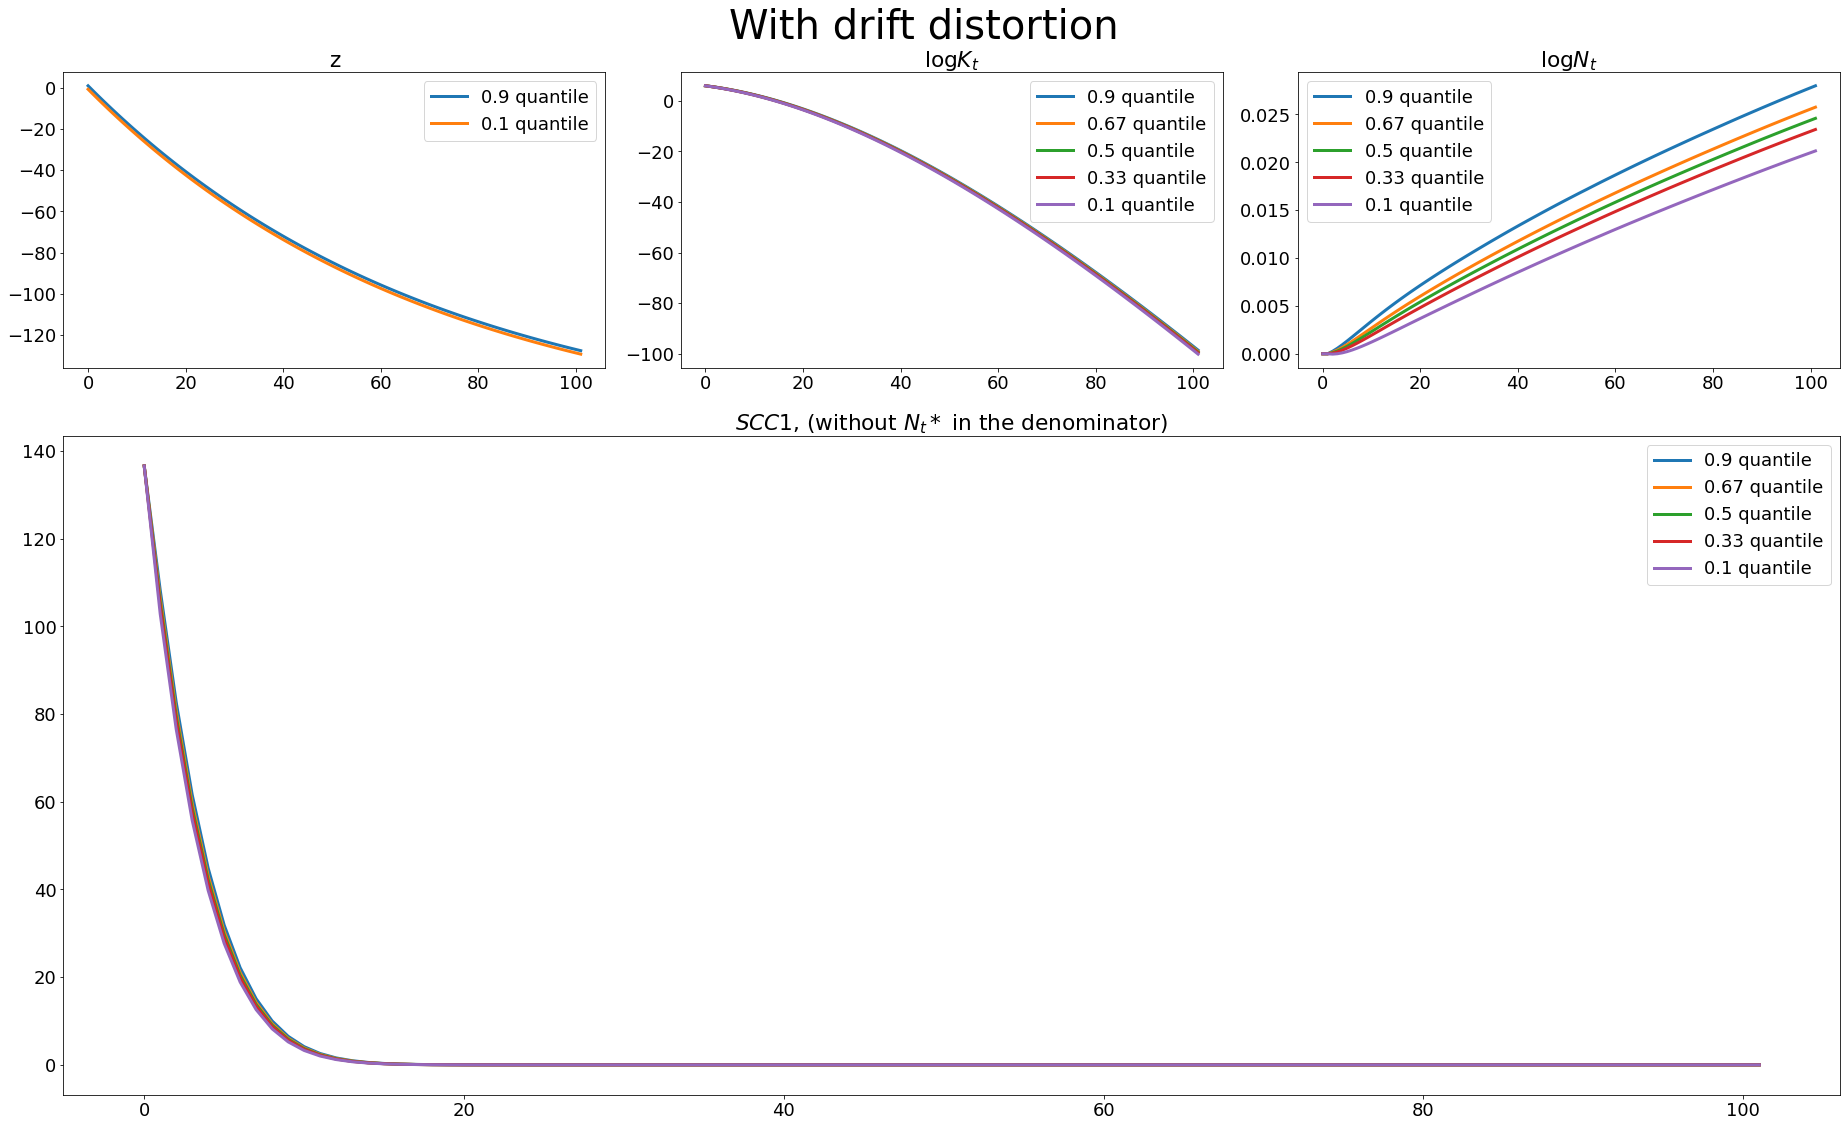

In [149]:
mpl.rcParams['lines.linewidth'] = 3

fig = plt.figure(figsize = (26,26))
# plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
plt.suptitle("With drift distortion", fontsize=40)
sub1 = fig.add_subplot(5,3,1) # two rows, two columns, fist cell
plot_quantile(ZtQuant_d, quantileList=[.1, .9])
plt.title('z')

sub1 = fig.add_subplot(5,3,2)
plot_quantile(logKQuant_d)
plt.title('$\logK_t$')
sub1 = fig.add_subplot(5,3,3)
plot_quantile(log_n_quantile)
plt.title('$\logN_t$')

sub2 = fig.add_subplot(5,3,(4,9))
plot_quantile(SCC2Quant)
plt.title('$SCC1$, (without $N_t*$ in the denominator)')

# sub2 = fig.add_subplot(5,3,(10,15))
# plot_quantile(SCC2Quant)
# plt.title('$SCC2$, (with $N_t*$ in the denominator)')
# plt.xlabel('years')
# # plt.savefig('With_distortion.png')